In [1]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the Data set 
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Exploratory data analysis (EDA)

In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isnull().sum()

class            0
message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)

In [8]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
plt.style.use('ggplot')

In [10]:
df.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
# to check top spam and ham messages

topmessages = df.groupby('message')['class'].agg([len,np.max]).sort_values(by = 'len' , ascending = False)
topmessages.head()

,len,amax
message,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham


In [12]:
# add new feature called lenght
df['length'] = df['message'].map(lambda text:len(text))

In [13]:
df.head()

,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Visualization

In [14]:
# count of ham and spam 
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

<AxesSubplot:>

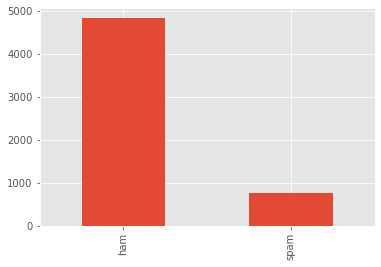

In [15]:
# bar plot for ham and spam 
df['class'].value_counts().plot.bar()

<AxesSubplot:xlabel='length', ylabel='Count'>

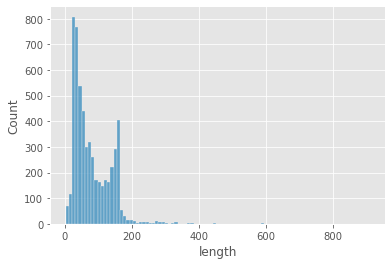

In [16]:
# lenght of messages
sns.histplot(df['length'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'spam message length')

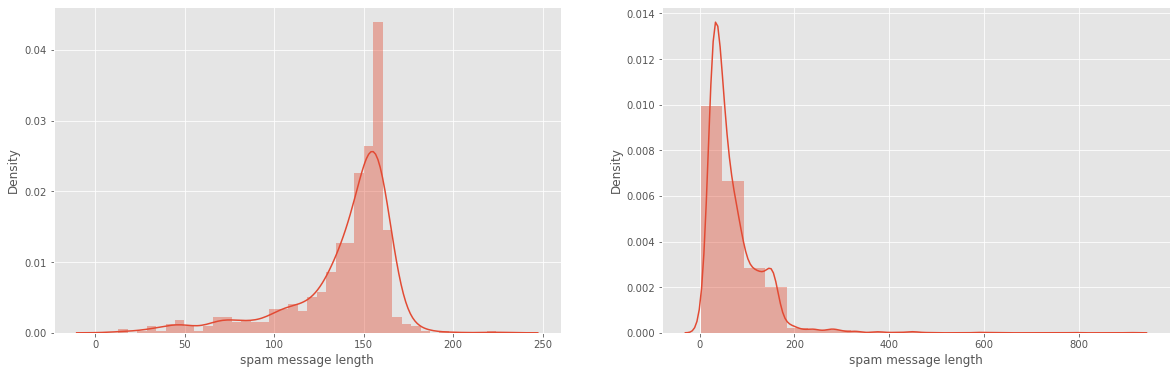

In [17]:
f, ax = plt.subplots(1, 2, figsize = (20, 6))
sns.distplot(df[df['class'] == 'spam']['length'],ax=ax[0])
ax[0].set_xlabel('spam message length')

sns.distplot(df[df["class"] == "ham"]["length"], bins = 20, ax = ax[1])
ax[1].set_xlabel('spam message length')

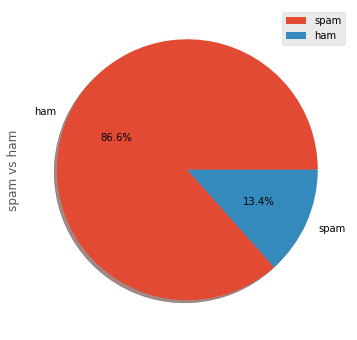

In [18]:
# pie chart of class
df['class'].value_counts().plot(kind = 'pie',figsize = (6,6),autopct = '%1.1f%%', shadow = True)
plt.ylabel('spam vs ham')
plt.legend(['spam','ham'])

In [19]:
# Text Preprocessing
import nltk
nltk.download('punkt')
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Study individual spam/ham word
spam_message = df[df['class'] == 'spam']['message']
ham_message =df[df['class'] == 'ham']['message']

spam_words = []
ham_words = []

def extractspamword(spamword):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamword) if word.lower() not in stopwords.words('english') and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extracthamword(hamword):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamword) if word.lower() not in stopwords.words('english') and word.lower().isalpha()]
    ham_words = ham_words + words

In [21]:
spam_message.apply(extractspamword)

2       None
5       None
8       None
9       None
11      None
        ... 
5537    None
5540    None
5547    None
5566    None
5567    None
Name: message, Length: 747, dtype: object

In [22]:
ham_message.apply(extracthamword)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: message, Length: 4825, dtype: object

In [23]:
# import wordcloud library
from wordcloud import WordCloud

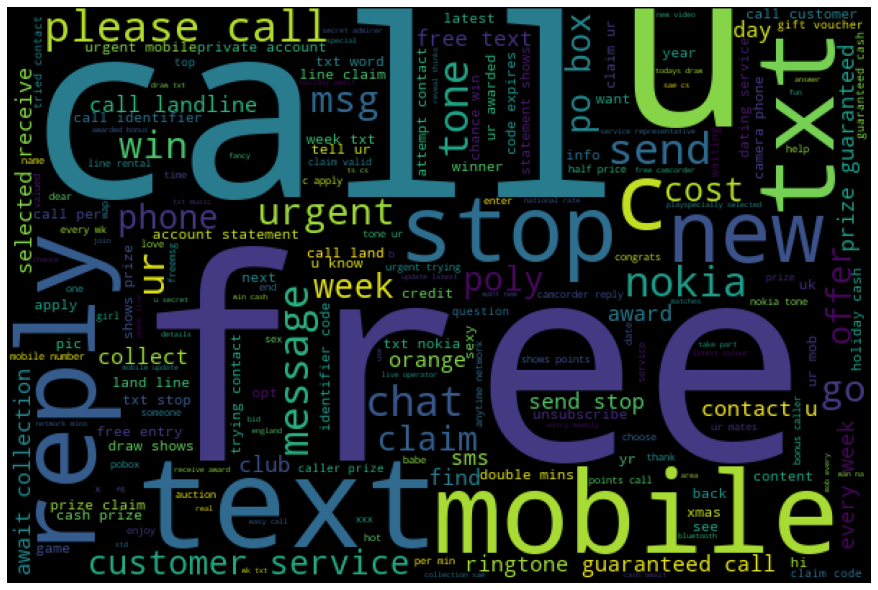

In [24]:
# word cloud generation for spam 
spam_wordcloud = WordCloud(width=600,height=400).generate(' '.join(spam_words))
plt.figure(figsize = (15,8))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

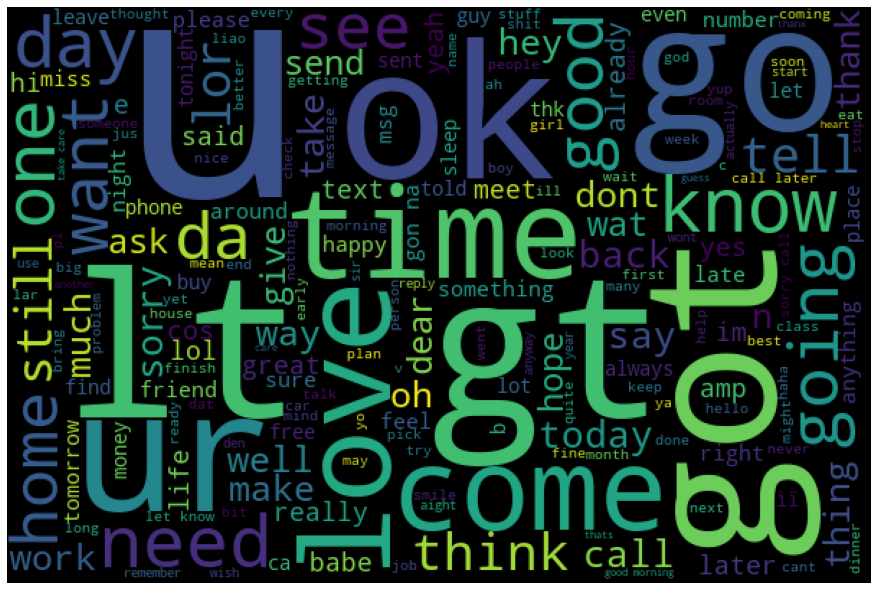

In [25]:
# ham word cloud geneation

ham_wordcloud = WordCloud(width = 600 ,height = 400).generate(' '.join(ham_words))
plt.figure(figsize = (15,8))
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [26]:
# top 10 spam words
spam_count = pd.DataFrame(spam_words)
print('Top 10 spam message')
spam_count.value_counts().head(10)

Top 10 spam message


call      346
free      219
txt       156
u         144
ur        144
mobile    123
text      121
stop      114
claim     113
reply     104
dtype: int64

In [27]:
# top 10 ham word
ham_count = pd.DataFrame(ham_words)
print('Top 10 hem message')
ham_count.value_counts().head(10)

Top 10 hem message


u       989
gt      318
lt      316
get     301
ok      256
go      248
got     242
ur      237
know    236
like    231
dtype: int64

### Data Preprocessing

In [28]:
df['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [29]:
# Data cleaning

def clean(message):
    meg = message.translate(str.maketrans('','',string.punctuation))
    meg= meg.lower()
    return meg

In [30]:
df.message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [31]:
df.message = df.message.apply(clean)
df.message

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ì b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: message, Length: 5572, dtype: object

In [32]:
# spacifing features and labels
feature_mtx = df['message']
labels = df['class']

In [33]:
feature_mtx

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ì b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: message, Length: 5572, dtype: object

In [34]:
labels

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: class, Length: 5572, dtype: object

In [35]:
from sklearn.model_selection import train_test_split # import splting model

In [36]:
# split the data 
x_train,x_test,y_train,y_test = train_test_split(feature_mtx,labels,test_size = 0.20)

In [37]:
# shape of splited data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4457,), (1115,), (4457,), (1115,))

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [39]:
# convert text data into integer using tf-idf

cv = CountVectorizer(stop_words='english')
x_train_count = cv.fit_transform(x_train)
tf_tran = TfidfTransformer().fit(x_train_count)
x_train_no = tf_tran.transform(x_train_count)

# test data
x_test_count = cv.transform(x_test)
tf_id_test = tf_tran.transform(x_test_count)

In [40]:
from sklearn.preprocessing import LabelEncoder # import label encoder

In [41]:
# for train 
LB = LabelEncoder()
y = LB.fit_transform(y_train)

In [42]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
label_map = dict(zip(LB.classes_,LB.fit_transform(LB.classes_)))
label_map

{'ham': 0, 'spam': 1}

In [44]:
# for test
LB = LabelEncoder()
y_test = LB.fit_transform(y_test)

In [45]:
y_test

array([0, 0, 0, ..., 0, 1, 1])

In [46]:
label_map = dict(zip(LB.classes_,LB.fit_transform(LB.classes_)))
label_map

{'ham': 0, 'spam': 1}

In [47]:
from sklearn.naive_bayes import MultinomialNB # importing model 

In [55]:
NB = MultinomialNB()
NB.fit(x_train_count,y)

MultinomialNB()

In [62]:
NB.score(x_test_count,y_test)

0.9838565022421525

In [57]:
prediction = NB.predict(tf_id_test)

In [58]:
prediction

array([0, 0, 0, ..., 0, 1, 1])

In [59]:
pred = pd.DataFrame({'y_true':y_test,'prediction':prediction})
pred

,y_true,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1110,0,0
1111,0,0
1112,0,0
1113,1,1


In [64]:
# check performance of model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [67]:
print('accuracy score',accuracy_score(y_test,prediction)*100)

accuracy score 98.47533632286995


[[978   1]
 [ 16 120]]


<AxesSubplot:>

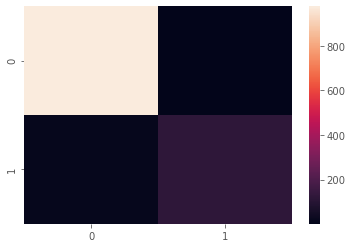

In [70]:
conf = confusion_matrix(y_test,prediction)
print(conf)

sns.heatmap(conf)

In [72]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       979
           1       0.99      0.88      0.93       136

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [74]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(NB,f)

In [75]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)
    